In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
dataset = pd.read_csv('E:\\ML Datasets\\Titanic\\train.csv')

In [19]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

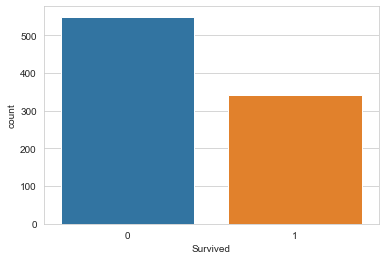

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset)

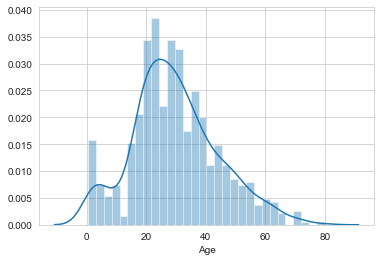

In [10]:
sns.distplot(dataset['Age'].dropna(),bins=30)

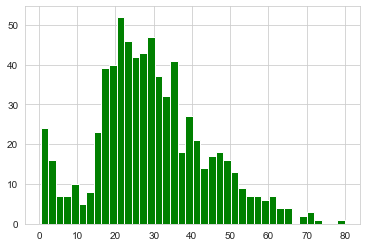

In [11]:
dataset['Age'].hist(bins=40,color='Green')

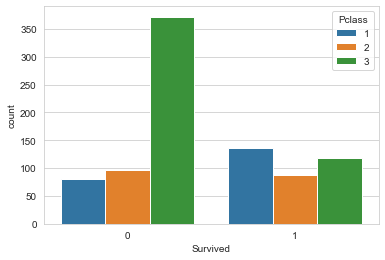

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset)

In [21]:
val_to_replace = {'male': 0, 'female':1}
dataset['Sex'] = dataset['Sex'].map(val_to_replace)

In [22]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [26]:
#Extracting titles from name
for row in dataset:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)          

In [27]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [71]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Lady          1
Ms            1
Capt          1
Jonkheer      1
Don           1
Countess      1
Mme           1
Name: Title, dtype: int64

In [28]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Sir":3,"Lady":3,"Ms":3,"Capt":3,"Jonkheer":3,"Don":3,"Countless":3,"Mme":3}
dataset['Title']=dataset['Title'].map(title_mapping)

In [29]:
dataset['Title'].isnull().sum()

1

In [30]:
dataset[dataset['Title'].isnull()].index.tolist()

[759]

In [31]:
dataset.iloc[759]

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                            1
Age                                                           33
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Title                                                        NaN
Name: 759, dtype: object

In [32]:
dataset.iloc[759,-1] = 3.0

In [33]:
dataset.iloc[759]

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                            1
Age                                                           33
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Title                                                          3
Name: 759, dtype: object

In [34]:
dataset['Title'].isnull().sum()

0

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [36]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform("median"),inplace=True)

In [37]:
dataset['Age'].isnull().sum()

0

In [38]:
dataset['Embarked'].isnull().sum()

2

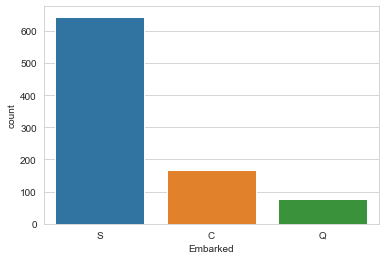

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=dataset)

In [40]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [41]:
dataset['Embarked'].isnull().sum()

0

In [42]:
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [43]:
dataset = pd.concat([dataset,embark],axis=1)

In [44]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,0,1


In [45]:
train_df = dataset

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,0,1


In [47]:
feature_drop = ['Name','Embarked','Ticket','Cabin']
train_df.drop(feature_drop,axis=1,inplace=True)

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0.0,0,1
1,2,1,1,1,38.0,1,0,71.2833,2.0,0,0
2,3,1,3,1,26.0,0,0,7.9250,1.0,0,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0.0,0,1


In [49]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Q              0
S              0
dtype: int64

In [50]:
x = train_df.drop('Survived',axis=1)

In [51]:
y = train_df['Survived']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = lg_model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
acc = confusion_matrix(y_test,y_pred)

In [57]:
acc

array([[149,  25],
       [ 19,  75]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.835820895522388

In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators = 150,random_state=0)

In [61]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
rtc_pred = rfc.predict(x_test)

In [63]:
accuracy=accuracy_score(y_test,rtc_pred)
accuracy

0.8246268656716418

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
grid_search = RandomForestClassifier()

In [66]:
parameters = { "n_estimators" : [90,100,150,200],
              "max_depth" : [5,7,9,12,15],
              "criterion" : ['entropy','gini']    
              }

In [67]:
grid = GridSearchCV(grid_search,parameters)

In [68]:
grid.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [69]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150}


In [70]:
new_rfc = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators=150)

In [71]:
new_rfc.fit(x_train,y_train)
new_rfc_pred = new_rfc.predict(x_test)


In [72]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,new_rfc_pred)
accuracy

0.835820895522388

In [73]:
# Support Vector Machine
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
clf_pred = clf.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,clf_pred)
accuracy

0.835820895522388

In [75]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()

In [76]:
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
y_pred_dt = model_dt.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.7276119402985075

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
y_pred_gb = model_gb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.7276119402985075

In [82]:
test_data = pd.read_csv('E:\\ML Datasets\\Titanic\\test.csv')

In [83]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [85]:
val_to_replace = {'male': 0, 'female':1}
test_data['Sex'] = test_data['Sex'].map(val_to_replace)

In [87]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
for row in test_data:
    test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  

In [89]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [91]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [92]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Sir":3,"Lady":3,"Ms":3,"Capt":3,"Jonkheer":3,"Don":3,"Countless":3,"Mme":3}
test_data['Title']=test_data['Title'].map(title_mapping)

In [93]:
test_data['Title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: Title, dtype: int64

In [94]:
test_data['Title'].isnull().sum()

1

In [95]:
test_data[test_data['Title'].isnull()].index.tolist()

[414]

In [96]:
test_data.iloc[414]

PassengerId                            1306
Pclass                                    1
Name           Oliva y Ocana, Dona. Fermina
Sex                                       1
Age                                      39
SibSp                                     0
Parch                                     0
Ticket                             PC 17758
Fare                                  108.9
Cabin                                  C105
Embarked                                  C
Title                                   NaN
Name: 414, dtype: object

In [97]:
test_data.iloc[414,-1] = 3.0

In [98]:
test_data.iloc[414]

PassengerId                            1306
Pclass                                    1
Name           Oliva y Ocana, Dona. Fermina
Sex                                       1
Age                                      39
SibSp                                     0
Parch                                     0
Ticket                             PC 17758
Fare                                  108.9
Cabin                                  C105
Embarked                                  C
Title                                     3
Name: 414, dtype: object

In [100]:
test_data['Title'].isnull().sum()

0

In [101]:
test_data['Age'].fillna(test_data.groupby("Title")["Age"].transform("median"),inplace=True)

In [102]:
test_data['Age'].isnull().sum()

0

In [103]:
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [104]:
test_data['Embarked'].isnull().sum()

0

In [106]:
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)

In [107]:
test_data = pd.concat([test_data,embark],axis=1)

In [108]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Q,S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0.0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2.0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0.0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0.0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2.0,0,1


In [109]:
feature_drop = ['Name','Embarked','Ticket','Cabin']
test_data.drop(feature_drop,axis=1,inplace=True)

In [110]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Q,S
0,892,3,0,34.5,0,0,7.8292,0.0,1,0
1,893,3,1,47.0,1,0,7.0000,2.0,0,1
2,894,2,0,62.0,0,0,9.6875,0.0,1,0
3,895,3,0,27.0,0,0,8.6625,0.0,0,1
4,896,3,1,22.0,1,1,12.2875,2.0,0,1


In [111]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Title          0
Q              0
S              0
dtype: int64

In [112]:
test_data[test_data['Fare'].isnull()].index.tolist()

[152]

In [113]:
test_data.iloc[152]

PassengerId    1044.0
Pclass            3.0
Sex               0.0
Age              60.5
SibSp             0.0
Parch             0.0
Fare              NaN
Title             0.0
Q                 0.0
S                 1.0
Name: 152, dtype: float64

In [116]:
test_data['Fare'].fillna((test_data["Fare"].mean()),inplace=True)

In [117]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Q              0
S              0
dtype: int64

In [118]:
#Prediction for test data set
test_pred = lg_model.predict(test_data)

In [119]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,